In [5]:
using Plots
using LaTeXStrings
using DifferentialEquations

In [11]:
"""
    euler(ivp,n)

Apply Euler's method to solve the given IVP using `n` time steps.
Returns a vector of times and a vector of solution values.
"""
function euler(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

    # Initial condition and output setup.
    u = fill(float(ivp.u0),n+1)

    # The time stepping iteration.
    for i in 1:n
        u[i+1] = u[i] + h*ivp.f(u[i],ivp.p,t[i])
    end
    return t,u
end

euler

In [3]:
function predprey(u, p, t)
    α, β = p
    y, z = u
    s = (y*z) / (1+β*y)
    return [y*(1-α*y)-s, -z+s]
end;

In [6]:
u₀ = [1, 0.01]
tspan = (0., 60.)
α, β = 0.1, 0.25

ivp = ODEProblem(predprey, u₀, tspan, [α, β])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 60.0)
u0: 2-element Vector{Float64}:
 1.0
 0.01

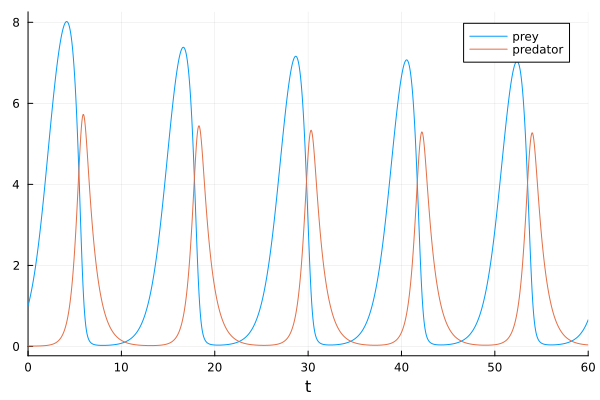

In [8]:
sol = solve(ivp, Tsit5())
plot(sol, label = ["prey" "predator"], titile = "Predator-prey solution")

In [9]:
t, u = sol.t, sol.u # extract times and solution values
@show size(u);
@show t[20];
@show u[20];

size(u) = (100,)
t[20] = 8.386699057811008


u[20] = [0.027739200084073493, 0.6994176605155754]


In [12]:
t, u = euler(ivp, 1200);

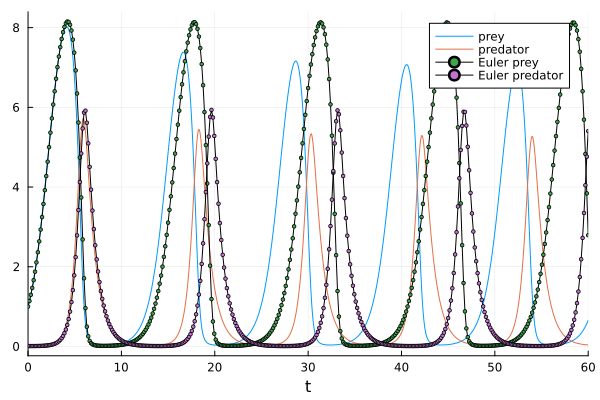

In [13]:
u = [ u[j] for u in u, j in 1:2]
plot!(t[1:3:end], u[1:3:end, :], l=(1, :black), m=2,
label = ["Euler prey" "Euler predator"])

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


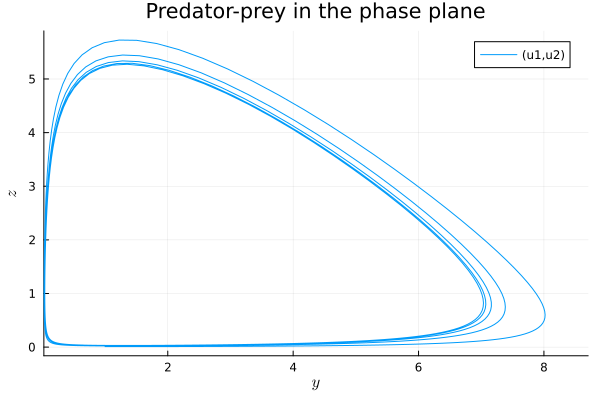

In [14]:
plot(sol, vars=(1,2), title="Predator-prey in the phase plane",
xlabel=L"y", ylabel=L"z")

In [15]:
function couple(u, p, t)
    γ, L, k = p
    g = 9.8
    udot = similar(u)
    udot[1:2] .= u[3:4]
    udot[3] = - γ * u[3] - (g/L) * sin(u[1]) + k * (u[2] - u[1])
    udot[4] = - γ * u[4] - (g/L) * sin(u[2]) + k * (u[1] - u[2])
    return udot
end

couple (generic function with 1 method)

In [16]:
u₀ = [1.25, -0.5, 0, 0]
tspan = (0., 50.);


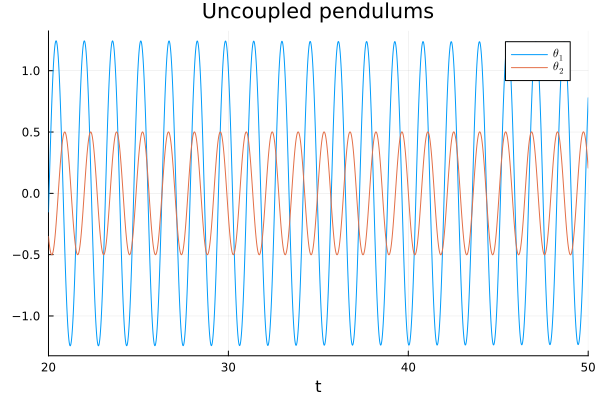

In [17]:
γ, L, k = 0, 0.5, 0
ivp = ODEProblem(couple, u₀, tspan, [γ, L, k])
sol = solve(ivp, Tsit5())
plot(sol, vars = [1,2], label = [L"\theta_1" L"\theta_2"],
    xlims=[20, 50], title = "Uncoupled pendulums")

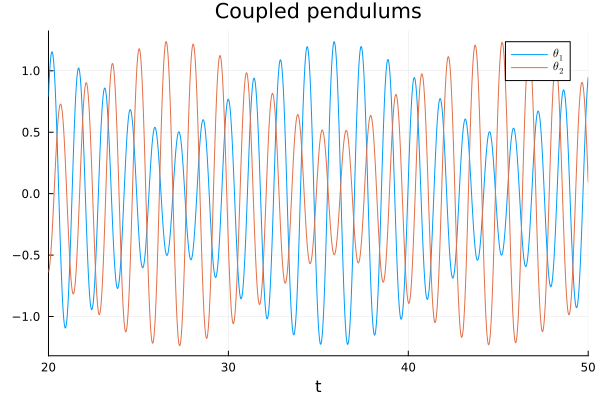

In [18]:
k = 1
ivp = ODEProblem(couple, u₀, tspan, [γ, L, k])
sol = solve(ivp, Tsit5())
plot(sol, vars = [1,2], label = [L"\theta_1" L"\theta_2"], 
    xlims = [20, 50], title = "Coupled pendulums")